In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("drought_prediction.csv")
df.head()

,Location,Soil Moisture (%),Soil Type,Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (km/h),Evaporation Rate (mm/day),Drought Risk Level,Prediction Accuracy (%)
0,Australia,35.75,Sandy,29.17,21.05,126.69,15.85,12.63,High,86.07
1,Texas,28.19,Sandy,39.44,23.79,84.30,13.52,11.55,Low,74.95
2,California,5.29,Silt,41.72,78.43,179.69,47.63,7.70,Medium,97.96
3,Spain,21.10,Loam,35.05,23.31,158.40,34.83,1.90,Medium,89.69
4,South Africa,32.52,Sandy,22.37,70.46,25.69,48.49,7.03,Medium,73.03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   1100 non-null   object 
 1   Soil Moisture (%)          1100 non-null   float64
 2   Soil Type                  1100 non-null   object 
 3   Temperature (°C)           1100 non-null   float64
 4   Humidity (%)               1100 non-null   float64
 5   Rainfall (mm)              1100 non-null   float64
 6   Wind Speed (km/h)          1100 non-null   float64
 7   Evaporation Rate (mm/day)  1100 non-null   float64
 8   Drought Risk Level         1100 non-null   object 
 9   Prediction Accuracy (%)    1100 non-null   float64
dtypes: float64(7), object(3)
memory usage: 86.1+ KB


In [4]:
df.describe()


,Soil Moisture (%),Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (km/h),Evaporation Rate (mm/day),Prediction Accuracy (%)
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,22.361727,32.610809,45.360818,103.298655,24.825664,7.883273,84.859664
std,9.790920,7.120005,19.972358,57.745354,14.373749,4.130225,8.359205
min,5.070000,20.010000,10.010000,0.070000,0.010000,1.010000,70.040000
25%,14.080000,26.427500,29.252500,53.962500,12.525000,4.117500,77.790000
50%,21.720000,32.470000,45.015000,104.335000,24.730000,7.840000,85.330000
75%,31.072500,38.787500,62.562500,154.362500,36.832500,11.560000,92.062500
max,39.970000,44.990000,79.950000,199.970000,49.890000,15.000000,98.930000


In [5]:
df.isnull().sum()

,0
Location,0
Soil Moisture (%),0
Soil Type,0
Temperature (°C),0
Humidity (%),0
Rainfall (mm),0
Wind Speed (km/h),0
Evaporation Rate (mm/day),0
Drought Risk Level,0
Prediction Accuracy (%),0


[]

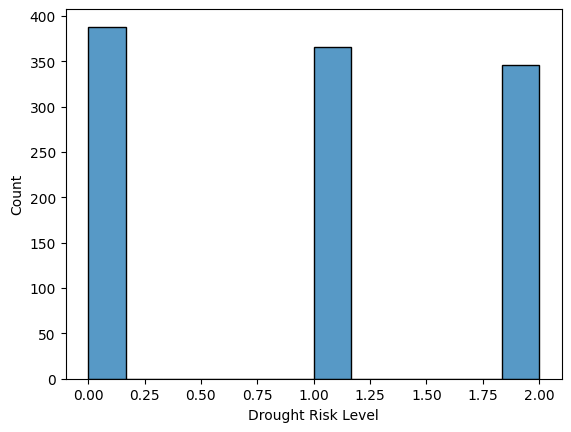

In [20]:
sns.histplot(df["Drought Risk Level"])
plt.plot()

[]

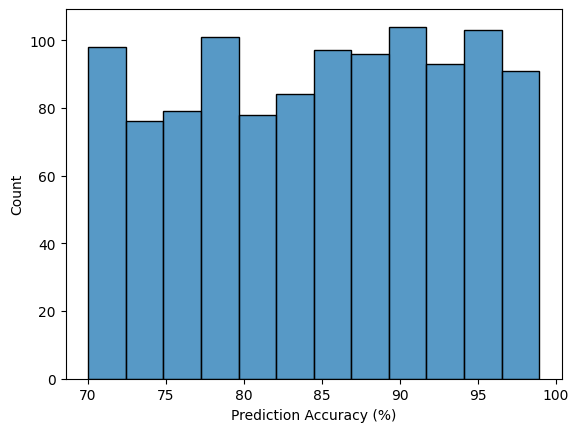

In [21]:
sns.histplot(df["Prediction Accuracy (%)"])
plt.plot()

In [7]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

In [8]:
# Step 2: Preprocess Data
# Encode categorical column 'Water Shortage Risk'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])

In [ ]:
# Step 2: Preprocess Data
# Encode categorical column 'Water Shortage Risk'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])


In [9]:
# Step 2: Preprocess Data
# Encode categorical column 'Water Shortage Risk'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Drought Risk Level'] = label_encoder.fit_transform(df['Drought Risk Level'])


In [10]:
df.head()



,Location,Soil Moisture (%),Soil Type,Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (km/h),Evaporation Rate (mm/day),Drought Risk Level,Prediction Accuracy (%)
0,1,35.75,4,29.17,21.05,126.69,15.85,12.63,0,86.07
1,9,28.19,4,39.44,23.79,84.30,13.52,11.55,1,74.95
2,3,5.29,5,41.72,78.43,179.69,47.63,7.70,2,97.96
3,8,21.10,2,35.05,23.31,158.40,34.83,1.90,2,89.69
4,7,32.52,4,22.37,70.46,25.69,48.49,7.03,2,73.03


In [11]:
# Step 3: Split features and target variable
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Prediction Accuracy (%)"])  # Features
y = df["Prediction Accuracy (%)"]  # Target variable

In [12]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# Step 5: Normalize the data to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)



In [15]:
# Step 6: Train the Linear Regression model

from sklearn.linear_model import LinearRegression
# class ka object
model = LinearRegression()
# fit is method(function) who are used for calculating all this
model.fit(xtrain, ytrain)



LinearRegression()

In [17]:
# Step 7: Make predictions
ypred = model.predict(xtest)



In [18]:
# Step 8: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
#R-sqaured Scored==>Accuracy

Mean Absolute Error: 7.068593826196049
Mean Squared Error: 66.18010763059162
R-squared Score: 0.005649176302445991
